In [1]:
import numpy as np
import pandas as pd
def create_cooccurrence_matrix(labels, num_classes):
    cooccurrence_matrix = np.zeros((num_classes, num_classes))
    
    for label in labels:
        for i in range(len(label)):
            for j in range(i+1, len(label)):
                if label[i] == 1 and label[j] == 1:
                    cooccurrence_matrix[i][j] += 1
                    cooccurrence_matrix[j][i] += 1

    # normalize the cooccurrence matrix
    cooccurrence_matrix = cooccurrence_matrix / np.max(cooccurrence_matrix)

    return cooccurrence_matrix


In [2]:
df = pd.read_csv("Dataset3_10.csv")

In [3]:
df

,text,0,1,2,3,4,5,6,7,8,9
0,That game hurt.,0,0,0,0,1,0,0,0,0,0
1,"You do right, if you don't care then fuck 'em!",1,0,0,0,0,0,0,0,0,0
2,Man I love reddit.,0,0,1,0,0,0,0,0,0,0
3,"[NAME] was nowhere near them, he was by the Fa...",1,0,0,0,0,0,0,0,0,0
4,Right? Considering it’s such an important docu...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
119005,Melissa stared at her friend in dism,0,0,0,0,0,1,0,0,0,0
119006,Successive state elections have seen the gover...,0,0,0,0,0,1,0,0,0,0
119007,Vincent was irritated but not dismay,0,0,0,0,0,1,0,0,0,0
119008,Kendall-Hume turned back to face the dismayed ...,0,0,0,0,0,1,0,0,0,0


In [4]:
labels = df.iloc[:,1:].values.tolist()

In [5]:
c = create_cooccurrence_matrix(labels, num_classes=10)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_matrix(matrix, labels):
    plt.figure(figsize=(10,10))
    sns.heatmap(matrix, annot=True, fmt=".2f", linewidths=.5, square=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Co-occurrence Matrix Heatmap', size=15)

# labels는 감정 카테고리의 리스트입니다.
labels = ["Neutral",'joy', 'Love', 'Warm', 'Sadness', 'Fear', 'Anger', 'Confusion','embarrassment','passion']

# create_cooccurrence_matrix 함수로부터 얻은 matrix를 사용합니다.
matrix = create_cooccurrence_matrix(your_labels, num_classes)

visualize_matrix(matrix, labels)


NameError: name 'your_labels' is not defined

/Users/binnny/miniconda3/envs/FYP/lib/python3.8/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/binnny/miniconda3/envs/FYP/lib/python3.8/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


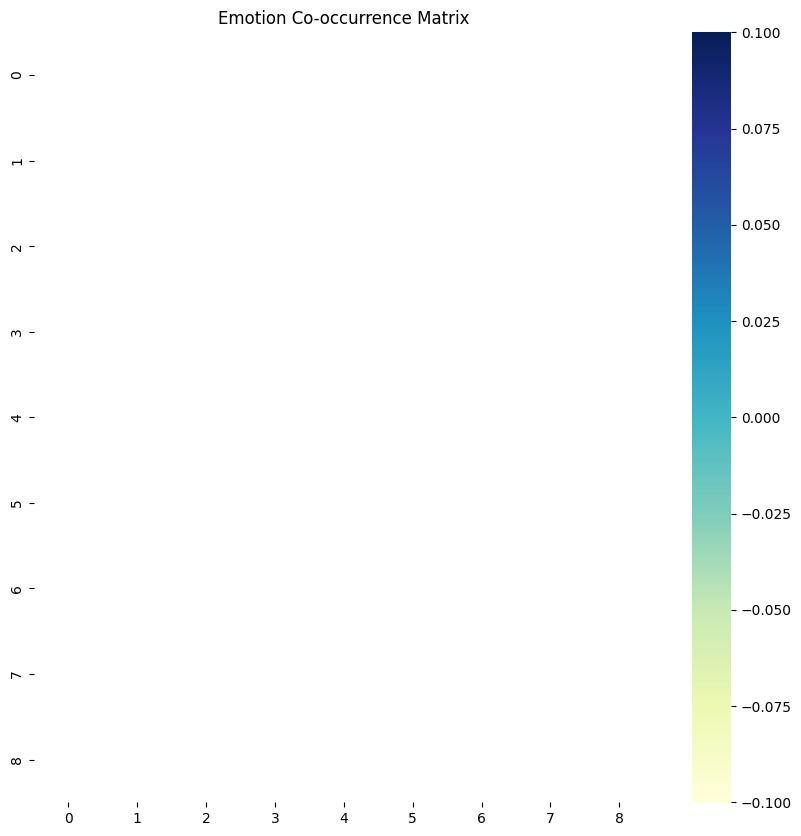

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(c, cmap='YlGnBu')
plt.title('Emotion Co-occurrence Matrix')
plt.show()

In [7]:
emotions = df.columns[1:]


In [8]:
emotions

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [9]:
cooccurrence_matrix = pd.DataFrame(data=0, index=emotions, columns=emotions, dtype=np.int32)


In [10]:
# 각 텍스트를 반복하면서 감정 쌍의 공기를 계산합니다.
for _, row in df.iterrows():
    active_emotions = row[emotions][row[emotions] == 1].index
    for emotion1 in active_emotions:
        for emotion2 in active_emotions:
            if emotion1 != emotion2:
                cooccurrence_matrix.loc[emotion1, emotion2] += 1

# 공기행렬 출력
print(cooccurrence_matrix)

   0    1     2     3    4    5    6    7    8    9
0  0    0     0     0    0    0    0    0    0    0
1  0    0   978   523  109   55  181  436   57   56
2  0  978     0  1427  262  167  443  909   94  208
3  0  523  1427     0  175   76  215  399   49   96
4  0  109   262   175    0  223  510  281   95   42
5  0   55   167    76  223    0  175  150   81   13
6  0  181   443   215  510  175    0  519  106   40
7  0  436   909   399  281  150  519    0   70   81
8  0   57    94    49   95   81  106   70    0    3
9  0   56   208    96   42   13   40   81    3    0


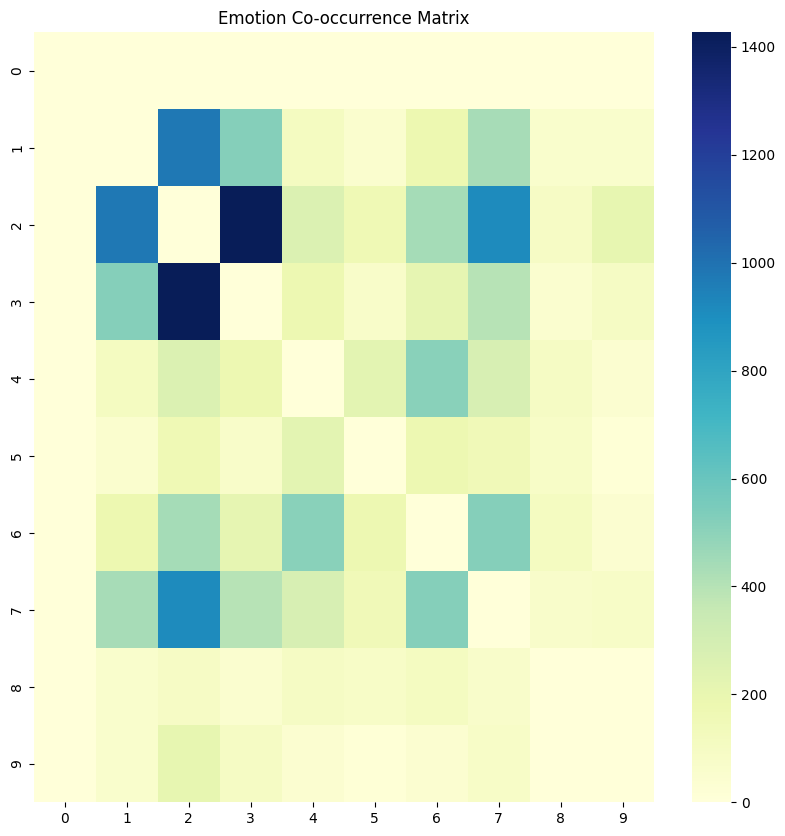

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cooccurrence_matrix, cmap='YlGnBu')
plt.title('Emotion Co-occurrence Matrix')
plt.show()

In [12]:

def normalize_correlations(correlations):
    # Calculate the sum of all correlations
    total_sum = np.sum(correlations)

    # Normalize correlations by dividing by the total sum
    normalized_correlations = correlations / total_sum

    return normalized_correlations

In [13]:
a = normalize_correlations(cooccurrence_matrix)

In [23]:
a

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.217914,0.176689,0.064231,0.058511,0.082686,0.153251,0.102703,0.103896
2,0.0,0.408351,0.000000,0.482095,0.154390,0.177660,0.202376,0.319508,0.169369,0.385900
3,0.0,0.218372,0.317959,0.000000,0.103123,0.080851,0.098218,0.140246,0.088288,0.178108
4,0.0,0.045511,0.058378,0.059122,0.000000,0.237234,0.232983,0.098770,0.171171,0.077922
5,0.0,0.022965,0.037210,0.025676,0.131408,0.000000,0.079945,0.052724,0.145946,0.024119
6,0.0,0.075574,0.098708,0.072635,0.300530,0.186170,0.000000,0.182425,0.190991,0.074212
7,0.0,0.182046,0.202540,0.134797,0.165586,0.159574,0.237095,0.000000,0.126126,0.150278
8,0.0,0.023800,0.020945,0.016554,0.055981,0.086170,0.048424,0.024605,0.000000,0.005566
9,0.0,0.023382,0.046346,0.032432,0.024750,0.013830,0.018273,0.028471,0.005405,0.000000


In [24]:
a.to_csv("corr_rels3_10.csv", index=False)

In [6]:
df = pd.read_csv("Dataset1_28.csv")
df1 = df.drop(columns=['text'])

In [7]:
import pandas as pd
import numpy as np

# 가정: df는 멀티 라벨 데이터를 포함하는 DataFrame

# 라벨 카디널리티 계산
label_cardinality = df1.sum(axis=1).mean()

# 라벨 밀도 계산
label_density = label_cardinality / df.shape[1]

print(f"Label Cardinality: {label_cardinality}")
print(f"Label Density: {label_density}")


Label Cardinality: 1.205750909405855
Label Density: 0.041577617565719135


In [14]:
df1 = pd.read_csv("dataset.csv")
df2 = pd.read_csv("tweet_emotions.csv")
df3 = pd.read_csv("Dataset1_28.csv")

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
0 : sadness
1 : Fun
2 : Love
3 : Hate
4 : Worry
5 : Surprise

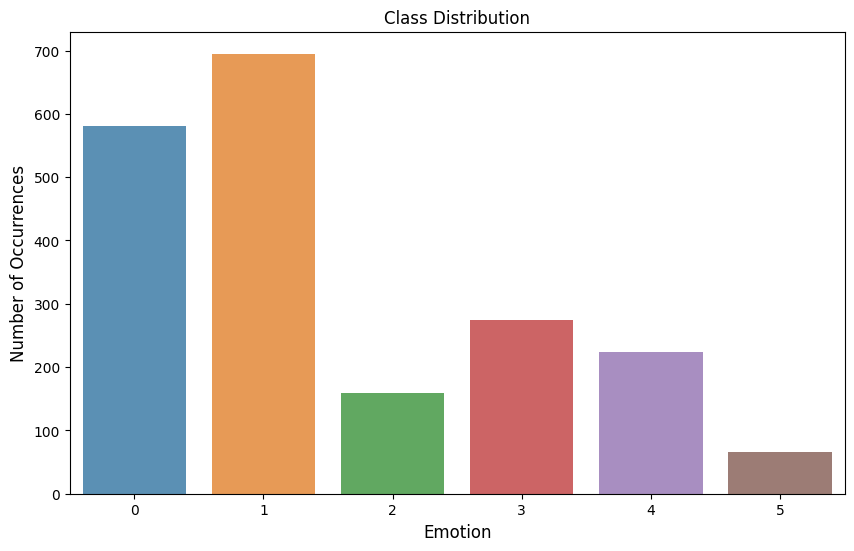

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스별 데이터 개수를 계산
class_counts = df1['label'].value_counts()

# 결과를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.8)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Emotion', fontsize=12)
plt.show()


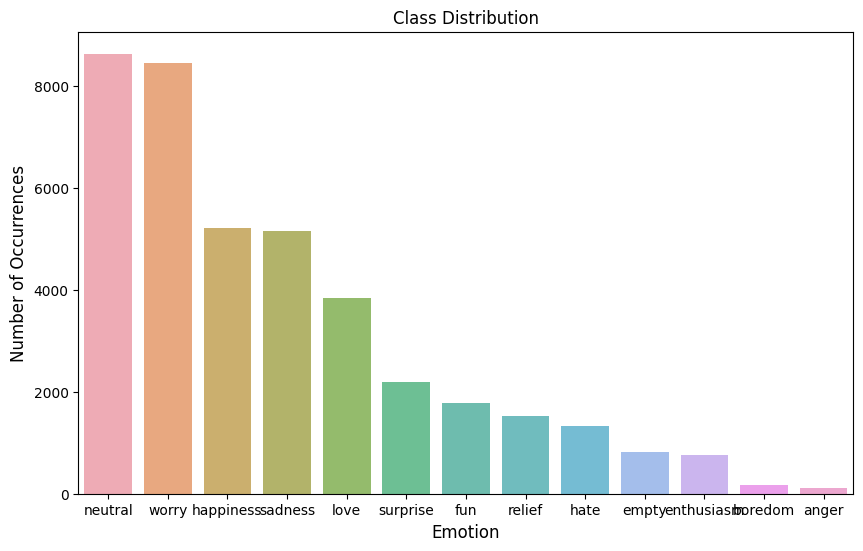

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스별 데이터 개수를 계산
class_counts = df2['sentiment'].value_counts()

# 결과를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.8)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Emotion', fontsize=12)
plt.show()


In [26]:
df3

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Right? Considering it’s such an important docu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57725,I didn’t even notice that one. I noticed the b...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57726,"Thanks, [NAME]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57727,Everyone likes [NAME].,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57728,Projecting pretty hard here.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# 컬럼 이름을 리스트로 가져오기
column_names = df3.columns.tolist()

print(column_names)


['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


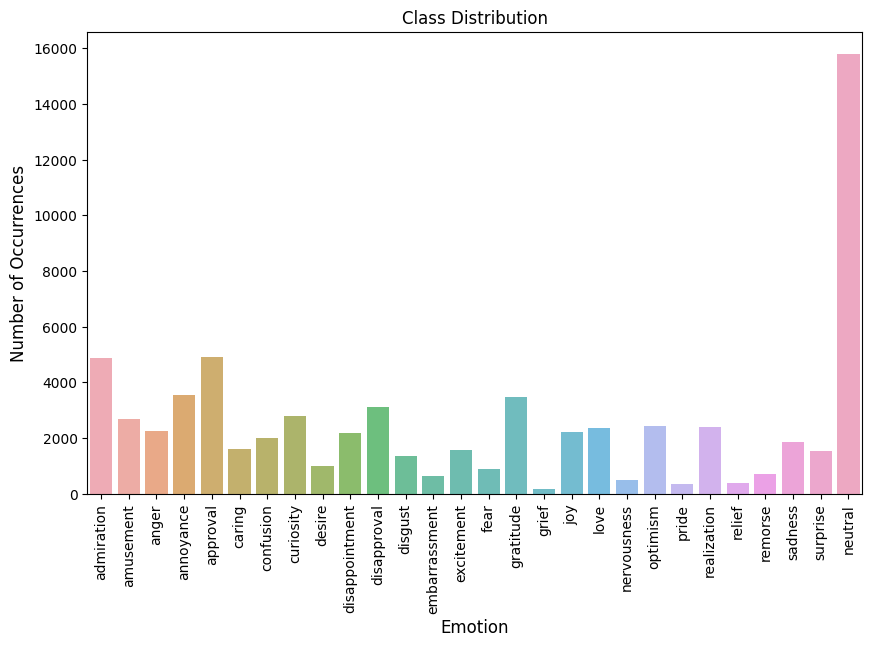

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스별 데이터 개수를 계산
class_counts = df3.iloc[:, 1:].value_counts()
labels = [
 'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

# 클래스별 데이터 개수를 계산
class_counts = df3[labels].sum()

# 결과를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.index), y=class_counts.values, alpha=0.8)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Emotion', fontsize=12)
plt.xticks(rotation=90)  # 라벨이 많아서 x축에 표시된 라벨이 겹친다면 이 줄을 추가
plt.show()


In [57]:
def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    print(text)
    text = text.split()
    print(text)
    return " ".join(text)

In [58]:
text = "hi my name is seungbin    nice to meet you"

In [59]:
remove_space(text)

hi my name is seungbin    nice to meet you
['hi', 'my', 'name', 'is', 'seungbin', 'nice', 'to', 'meet', 'you']


'hi my name is seungbin nice to meet you'